In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/Shareddrives/group12 cs4824/code")

Mounted at /content/drive


In [ ]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
###### special from sklearn ######
from sklearn.preprocessing import OrdinalEncoder,RobustScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

In [ ]:
# Import our data and check out its dimensions 
data = pd.read_csv("music_genre.csv")
print(f"{data.shape[0]} rows, {data.shape[1]} columns")
# Check out the dataset
data.head(20)

50005 rows, 18 columns


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.004680,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.7590,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.012700,0.622,218293.0,0.890,0.950000,D,0.1240,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.5310,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.003060,0.620,215613.0,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.3330,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.025400,0.774,166875.0,0.700,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014,4-Apr,0.2700,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.004650,0.638,222369.0,0.587,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036,4-Apr,0.3230,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.005230,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.6140,Electronic
6,43760.0,Jordan Comolli,Clash,46.0,0.028900,0.572,214408.0,0.803,0.000008,B,0.1060,-4.294,Major,0.3510,149.995,4-Apr,0.2300,Electronic
7,30738.0,Hraach,Delirio,43.0,0.029700,0.809,416132.0,0.706,0.903000,G,0.0635,-9.339,Minor,0.0484,120.008,4-Apr,0.7610,Electronic
8,84950.0,Kayzo,NEVER ALONE,39.0,0.002990,0.509,292800.0,0.921,0.000276,F,0.1780,-3.175,Minor,0.2680,149.94799999999998,4-Apr,0.2730,Electronic
9,56950.0,Shlump,Lazer Beam,22.0,0.009340,0.578,204800.0,0.731,0.011200,A,0.1110,-7.091,Minor,0.1730,139.933,4-Apr,0.2030,Electronic


In [ ]:
# clean nan
data = data.dropna(axis=0)
print(f"{data.shape[0]} rows, {data.shape[1]} columns")

50000 rows, 18 columns


In [ ]:
df=data.drop(['instance_id','artist_name', 'track_name','obtained_date'], axis=1)
# Feature Selection
df.drop(['key', 'mode'], axis=1, inplace=True)
df.head()
#df[['key','mode']] = OrdinalEncoder().fit_transform(df[['key','mode']])
df['tempo'].replace(to_replace = '?', value =-1.0, inplace=True)
df['instrumentalness'].replace(to_replace = 0.0, value =-1.0, inplace=True)
df['tempo'] = pd.to_numeric(df['tempo'])
imp = SimpleImputer(missing_values = -1.0, strategy = 'median')
df[['tempo','duration_ms','instrumentalness']] = imp.fit_transform(df[['tempo','duration_ms','instrumentalness']])
scaler = StandardScaler()
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1].values)
data1=df

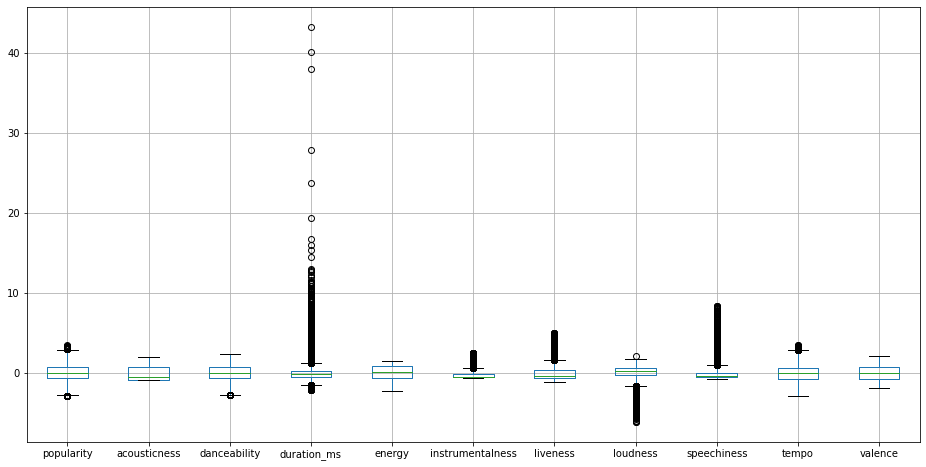

In [ ]:
# check outliers
boxplot = data1.boxplot(figsize=(16,8))  
# duration_ms have too much outliers, drop duration_ms
#data1=data1.drop(['duration_ms'], axis=1)


In [ ]:
# 70% train, 30% test
dataTrain = data1.sample(frac=0.7, random_state=1)    
dataTest = data1.drop(dataTrain.index) 
xTrain = dataTrain.drop(['music_genre'], axis=1).values
yTrain = dataTrain['music_genre'].values
xTest = dataTest.drop(['music_genre'], axis=1).values
yTest = dataTest['music_genre'].values

In [ ]:
#KNN
j=0
a=0
for i in list(range(1,31)):
  knn=KNeighborsClassifier(i).fit(xTrain,yTrain)
  #knn.fit(xTrain,yTrain)
  score = knn.score(xTest, yTest)
  if score>j:
    j=score
    a=i
print(a)
print(j)

33
0.5405333333333333


In [ ]:
knn1=KNeighborsClassifier(a).fit(xTrain,yTrain)
knn1.fit(xTrain,yTrain)
pred = knn1.predict(xTest)

print(classification_report(yTest,pred))

              precision    recall  f1-score   support

 Alternative       0.40      0.34      0.37      1496
       Anime       0.73      0.68      0.70      1492
       Blues       0.59      0.49      0.53      1512
   Classical       0.80      0.85      0.83      1533
     Country       0.42      0.58      0.49      1511
  Electronic       0.65      0.54      0.59      1462
     Hip-Hop       0.42      0.50      0.45      1476
        Jazz       0.52      0.45      0.48      1482
         Rap       0.43      0.32      0.37      1514
        Rock       0.49      0.61      0.54      1522

    accuracy                           0.54     15000
   macro avg       0.54      0.54      0.54     15000
weighted avg       0.54      0.54      0.54     15000



In [ ]:
pip install spotipy --upgrade

     |████████████████████████████████| 63 kB 933 kB/s 
     |████████████████████████████████| 138 kB 33.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = '10f92907722c44d5a24ed6486e961379'
secret = 'b1c12d2638ed4996a4b72ab313f49f1b'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

In [ ]:
artist= input("Enter artist name: ")
track= input("Enter track name: ")

found = sp.search(q='artist:' + artist + ' track:' + track, type='track')
trackId = found['tracks']['items'][0]['id']

audio_features = sp.audio_features(trackId)[0]
sample = pd.DataFrame.from_dict([audio_features])
df_sample = data1.median(numeric_only=True)
df_sample['popularity'] = found['tracks']['items'][0]['popularity'] #0
df_sample['danceability'] = sample['danceability'].values[0] #2
df_sample['energy'] = sample['energy'].values[0] #4
df_sample['loudness'] = sample['loudness'].values[0] #7
df_sample['speechiness'] = sample['speechiness'].values[0] #8
df_sample['acousticness'] = sample['acousticness'].values[0] #1
df_sample['instrumentalness'] = sample['instrumentalness'].values[0] #5
df_sample['valence'] = sample['valence'].values[0] #10
df_sample['tempo'] = sample['tempo'].values[0] #9
df_sample['liveness'] = sample['liveness'].values[0] #6
df_sample['duration_ms'] = sample['duration_ms'].values[0] #3
df_sample = scaler.transform([df_sample])

print("Predicted Genre: ",knn1.predict(df_sample)[0])

Enter artist name: Gorillaz
Enter track name: Feel Good Inc
Predicted Genre:  Hip-Hop
